In [3]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)


quantificators = ["CC", "ACC", "PCC", "PACC", "HDy", "EMQ","MLPE"]
error = "bias"
dateexperiment = "2022_06_22_17_27"

mean_error_methods = {}

for quant_name in quantificators:
    results = pd.read_csv("results/concept/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
    results['MAE'] = results['error'].abs()
    results_mean = results.groupby(['cut_point_train', 'cut_point_test'])['MAE'].mean().reset_index()
    #convert to matrix form
    results_mean = results_mean.pivot(index='cut_point_train', columns='cut_point_test', values='error')
    mean_error_methods[quant_name]=results_mean.mean().mean()
   
    print("Results for method %s. Mean MAE: %f" % (quant_name, mean_error_methods[quant_name]))
    cm = sns.light_palette('red', as_cmap=True)
    display(results_mean.style.background_gradient(cmap=cm,low=0,high=1))

0       [-0.022  0.022]
1       [-0.024  0.024]
2       [-0.042  0.042]
3         [-0.03  0.03]
4       [-0.056  0.056]
             ...       
4495    [-0.036  0.036]
4496    [-0.012  0.012]
4497    [-0.012  0.012]
4498    [-0.028  0.028]
4499      [-0.07  0.07]
Name: error, Length: 4500, dtype: object


KeyError: 'Column not found: MAE'

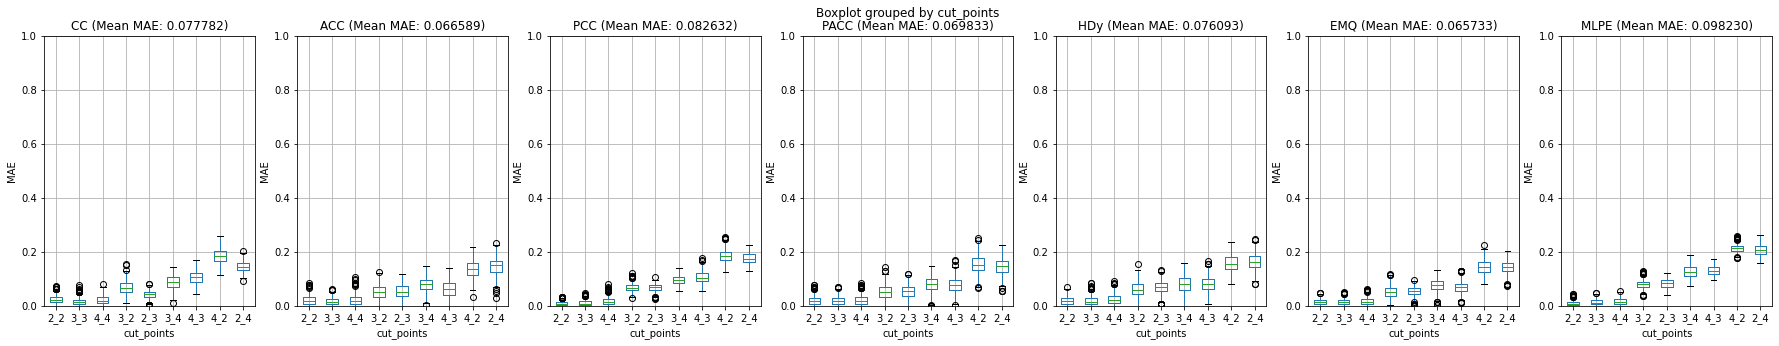

In [28]:
fig, ax = plt.subplots(1,len(quantificators),figsize=(30,5))

for k,quant_name in enumerate(quantificators):
    results = pd.read_csv("results/concept/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
    results['cut_points'] = results['cut_point_train'].astype(str)+'_'+results['cut_point_test'].astype(str)
    ax[k].set_ylim(-0.5, 0.5)
    ax[k].set_ylabel(error)
    fig.tight_layout()

    results.boxplot(ax=ax[k],column='error',by='cut_points',positions=[0,4,8,3,1,5,7,6,2]) #[0,4,8,1,5,3,7,2,6]
    ax[k].set_title("%s (Mean MAE: %f)"  % (quant_name,'MAE',mean_error_methods[quant_name]))